## Project 1
- LiPing Liu


#Loading Data


In [2]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = '/content/drive/MyDrive/02 Week 2 Pandas/sales_predictions.csv'
df = pd.read_csv(filename)

# Data Cleaning


In [5]:
df.info()
df.head()
#1 #2 we got 12 columns and 8523 rows and can see the data type for below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#3 Are there duplicates? If so, drop any duplicates.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [7]:
df.duplicated().sum()
# for here we can know that there is no duplicate

0

In [8]:
#4. Identify missing values.
df.isna().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# For above, we know that Item_weight and Outlet_size have data missing
# I think outlet_size matter so I am going to replace NaN to 'Missing Data'
df['Outlet_Size'].fillna('Missing', inplace = True)

In [10]:
# take my own judment that item weight should not be matter so i decided to remove it
df.drop(columns='Item_Weight', inplace=True)

In [11]:
#6.Confirm that there are no missing values after addressing them.
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
#7 Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).
df.value_counts()

Item_Identifier  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV28            Regular           0.000000         Frozen Foods           35.1558   OUT017             2007                       Missing      Tier 2                Supermarket Type1  339.5580             1
FDV32            Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Missing      Tier 2                Supermarket Type1  1328.2710            1
                                   0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Medium       Tier 3                Superma

In [13]:
df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df.replace(['LF','low fat'],['Low Fat','Low Fat'], inplace = True)
df.replace(['reg'],['Regular'], inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [15]:
#8.For any numerical columns, obtain the summary statistics of each (min, max, mean).
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


#Exploratory Visuals

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

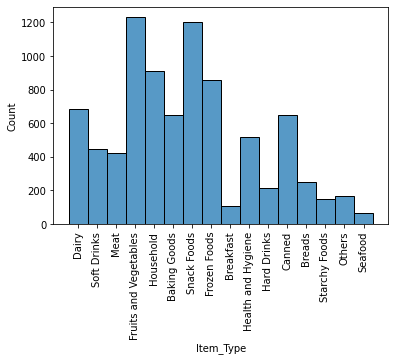

In [22]:
#Histogram to view the distributions of various features in your dataset.
sns.histplot(data= df, x='Item_Type');
plt.xticks(rotation = 90);
#from this Histograns, we can tell that we have the most item type will be fruits and vegetables and least will be seafood.

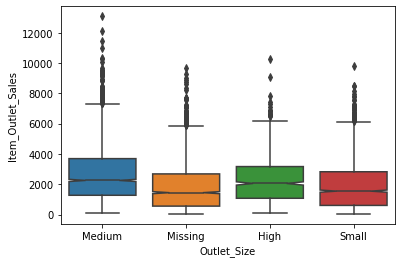

In [33]:
#Boxplot to view statistical summaries of various features in your dataset.
sns.boxplot(data=df, y='Item_Outlet_Sales', x='Outlet_Size', notch=True)

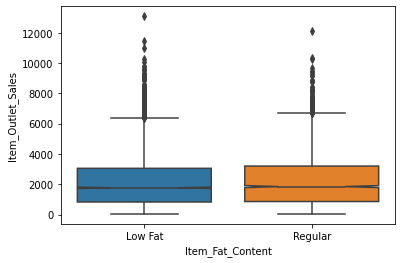

In [39]:
sns.boxplot(data=df, y='Item_Outlet_Sales', x='Item_Fat_Content', notch=True);

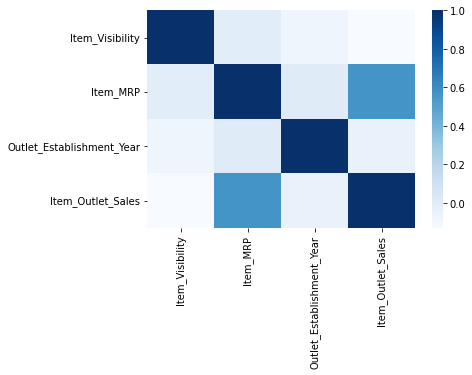

In [27]:
#Heatmap of the correlation between features.
corr = df.corr()
sns.heatmap(corr, cmap ='Blues');
#Item MRP AND Item Outlet sales has positive correction. 